In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
from sklearn.naive_bayes import MultinomialNB

In [4]:
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
data = pd.read_csv('youtube2.csv', encoding = "utf-8")

In [19]:
data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out.,1


In [21]:
data.drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis = 1, inplace = True)

In [22]:
data.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^,1
4,watch?v=vtaRGgvGtWQ Check this out.,1


In [23]:
data['CONTENT']=data['CONTENT'].str.lower()

In [24]:
data['CONTENT'][0]

'huh, anyway check out this you[tube] channel: kobyoshi02'

In [25]:
data['CONTENT'] = data['CONTENT'].str.replace('\n|\t|\r|\d+', '', regex=True) # kaçış karakterleri ve rakamları kaldır

In [26]:
data['CONTENT'][0]

'huh, anyway check out this you[tube] channel: kobyoshi'

<AxesSubplot:xlabel='CLASS', ylabel='count'>

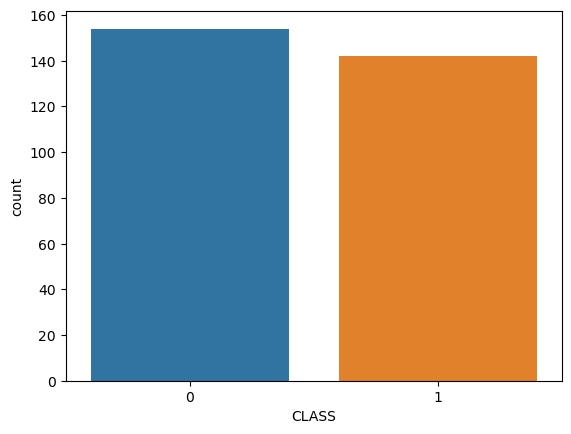

In [27]:
import seaborn as sns
sns.countplot(x=data['CLASS'])

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [29]:
X=data['CONTENT']
y=data['CLASS']

In [31]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vect=CountVectorizer(stop_words='english')

In [32]:
X=vect.fit_transform(X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [34]:
tf=pd.DataFrame(X_train.toarray(),columns=vect.get_feature_names_out())

In [35]:
tf.head()

,__killuminati,_bzszz,_chris_cz,_ffaaa,_fphgkzllsvdqvzufmb,_gibu,_oh,_ryfsprndxv,_thqbeumaqupih,_vlczzrgvgctlpsdongewhj,...,yt,zero,zombie,zxlightsoutxz,강남스타일,ｃｏｍｍｅｎｔ,ｄａｍｎ,ｆａｎｃy,ｉｓ,ｔｈｉｓ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
tf.shape

(236, 940)

In [37]:
lr=LogisticRegression()

In [38]:
lr.fit(X_train,y_train)

LogisticRegression()

In [39]:
pred=lr.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [42]:
accuracy_score(y_test,pred)

0.95